[*********************100%%**********************]  1 of 1 completed
C:\Users\jpate\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 279ms/step - loss: 0.0038 - val_loss: 0.0074
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 251ms/step - loss: 5.5434e-04 - val_loss: 0.0093
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 237ms/step - loss: 2.7619e-04 - val_loss: 0.0175
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 235ms/step - loss: 2.4077e-04 - val_loss: 0.0282
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 242ms/step - loss: 2.1231e-04 - val_loss: 0.0278
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 224ms/step - loss: 1.5035e-04 - val_loss: 0.0289
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 230ms/step - loss: 1.2810e-04 - val_loss: 0.0297
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 236ms/step - loss: 1.3172e-04 - val_loss: 0.0330
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 309ms/step - loss: 1.1694e-04 - val_loss: 0.0294
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 307ms/step - loss: 1.1973e-04 - val_loss: 0.0329
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - loss: 1.1269e-04 - val_loss: 0.0272
Epoch 12/5

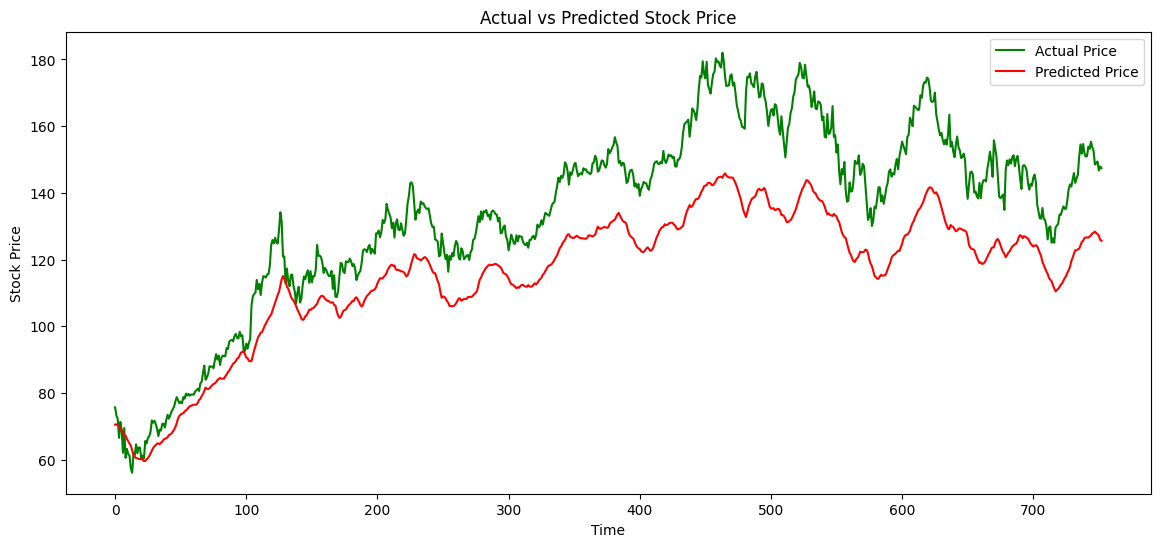

C:\Users\jpate\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0510 - val_loss: 0.1248
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0020 - val_loss: 0.1363
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.0822e-04 - val_loss: 0.1092
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.6751e-04 - val_loss: 0.0992
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.2907e-04 - val_loss: 0.0838
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.1379e-05 - val_loss: 0.0875
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 8.1459e-05 - val_loss: 0.0780
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.2545e-05 - val_loss: 0.0727
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.9276e-05 - val_loss: 0.0632
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.5625e-05 - val_loss: 0.0716
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.0061e-05 - val_loss: 0.0632
Epoch 12/50
31/31 ━━━━━━━━━

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt

# Download stock data
stock = 'AAPL'  # Example: AAPL (Apple)
start_date = '2011-01-01'
end_date = '2023-03-01'

df = yf.download(stock, start=start_date, end=end_date)

# Feature Engineering: Adding Technical Indicators
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df['RSI'] = 100 - (100 / (1 + (df['Close'].diff(1).clip(lower=0).rolling(window=14).mean() /
                               df['Close'].diff(1).clip(upper=0).abs().rolling(window=14).mean())))
df['Upper_Band'] = df['Close'].rolling(window=20).mean() + (2 * df['Close'].rolling(window=20).std())
df['Lower_Band'] = df['Close'].rolling(window=20).mean() - (2 * df['Close'].rolling(window=20).std())
df.dropna(inplace=True)  # Remove rows with NaN values

# Preprocess Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close', 'MA20', 'MA50', 'RSI', 'Upper_Band', 'Lower_Band']])

# Training and Testing Split
training_size = int(len(scaled_data) * 0.7)
train_data = scaled_data[:training_size]
test_data = scaled_data[training_size:]

# Prepare Data for LSTM
def create_dataset(data, lookback=150):
    x, y = [], []
    for i in range(lookback, len(data)):
        x.append(data[i - lookback:i])
        y.append(data[i, 0])  # Predicting 'Close' price
    return np.array(x), np.array(y)

lookback = 150
x_train, y_train = create_dataset(train_data, lookback)
x_test, y_test = create_dataset(test_data, lookback)

# Bidirectional LSTM Model
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))),
    Dropout(0.2),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))

# Evaluate Model
y_predicted = model.predict(x_test)
y_test_scaled = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), np.zeros((len(y_test), scaled_data.shape[1] - 1)))))
y_predicted_scaled = scaler.inverse_transform(np.hstack((y_predicted, np.zeros((len(y_predicted), scaled_data.shape[1] - 1)))))

mae = mean_absolute_error(y_test_scaled[:, 0], y_predicted_scaled[:, 0])
rmse = np.sqrt(mean_squared_error(y_test_scaled[:, 0], y_predicted_scaled[:, 0]))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Visualization: Predicted vs Actual
plt.figure(figsize=(14, 6))
plt.plot(y_test_scaled[:, 0], label='Actual Price', color='green')
plt.plot(y_predicted_scaled[:, 0], label='Predicted Price', color='red')
plt.title('Actual vs Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Optional: CNN-LSTM Model (Experimental)
cnn_lstm_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1)
])
cnn_lstm_model.compile(optimizer='adam', loss='mean_squared_error')
cnn_lstm_model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))
